In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../../Functions/')

from EDA_functions import ExploratoryDataAnalysis
eda = ExploratoryDataAnalysis()

In [10]:
pd.options.display.max_rows = 150 
pd.set_option("display.max_colwidth", 300)
plt.style.use('seaborn-darkgrid')

In [11]:
columns_desc = pd.read_csv('../../Datasets/HomeCredit_columns_description.csv', encoding = 'latin-1', index_col = 0)
columns_desc.replace('SK_ID_PREV ', 'SK_ID_PREV', inplace = True)

### 3. Previous Applications

All previous applications for Home Credit loans of clients who have loans in our sample. There is one row for each previous application related to loans in our data sample.


In [12]:
# reading the dataset
previous_app = pd.read_csv("../../Datasets/previous_application.csv")

In [13]:
previous_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

Firstly, let's analyze the shape of the dataset.

In [14]:
print("The Previous Application Set has %d rows and %d columns." % (previous_app.shape[0], previous_app.shape[1]))

The Previous Application Set has 1670214 rows and 37 columns.


In [15]:
columns_desc[columns_desc['Table'] == 'previous_application.csv']

Table                          Row  \
176  previous_application.csv                   SK_ID_PREV   
177  previous_application.csv                   SK_ID_CURR   
178  previous_application.csv           NAME_CONTRACT_TYPE   
179  previous_application.csv                  AMT_ANNUITY   
180  previous_application.csv              AMT_APPLICATION   
181  previous_application.csv                   AMT_CREDIT   
182  previous_application.csv             AMT_DOWN_PAYMENT   
183  previous_application.csv              AMT_GOODS_PRICE   
184  previous_application.csv   WEEKDAY_APPR_PROCESS_START   
185  previous_application.csv      HOUR_APPR_PROCESS_START   
186  previous_application.csv  FLAG_LAST_APPL_PER_CONTRACT   
187  previous_application.csv       NFLAG_LAST_APPL_IN_DAY   
188  previous_application.csv             NFLAG_MICRO_CASH   
189  previous_application.csv            RATE_DOWN_PAYMENT   
190  previous_application.csv        RATE_INTEREST_PRIMARY   
191  previous_application.csv     RATE_INTEREST_PRIVILEGED   
192  previous_application.csv       NAME_CASH_LOAN_PURPOSE   
193  previous_application.csv         NAME_CONTRACT_STATUS   
194  previous_application.csv                DAYS_DECISION   
195  previous_application.csv            NAME_PAYMENT_TYPE   
196  previous_application.csv           CODE_REJECT_REASON   
197  previous_application.csv              NAME_TYPE_SUITE   
198  previous_application.csv             NAME_CLIENT_TYPE   
199  previous_application.csv          NAME_GOODS_CATEGORY   
200  previous_application.csv               NAME_PORTFOLIO   
201  previous_application.csv            NAME_PRODUCT_TYPE   
202  previous_application.csv                 CHANNEL_TYPE   
203  previous_application.csv             SELLERPLACE_AREA   
204  previous_application.csv         NAME_SELLER_INDUSTRY   
205  previous_application.csv                  CNT_PAYMENT   
206  previous_application.csv             NAME_YIELD_GROUP   
207  previous_application.csv          PRODUCT_COMBINATION   
208  previous_application.csv           DAYS_FIRST_DRAWING   
209  previous_application.csv               DAYS_FIRST_DUE   
210  previous_application.csv    DAYS_LAST_DUE_1ST_VERSION   
211  previous_application.csv                DAYS_LAST_DUE   
212  previous_application.csv             DAYS_TERMINATION   
213  previous_application.csv    NFLAG_INSURED_ON_APPROVAL   

                                                                                                                                                                                                                                                             Description  \
176                               ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)    
177                                                                                                                                                                                                                                             ID of loan in our sample   
178                                                                                                                                                                              Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application   
179                                                                                                                                                                                                                                      Annuity of previous application   
180                                                                                                                                                                                                       For how much credit did client ask on the previous application 

In [17]:
app_train = pd.read_csv("../../Datasets/application_train.csv")
app_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [18]:
previous_app['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

We saw in the Application dataset that there were two types of loans: Cash loans (which included the Consumer loans) and the revolving loans (credit cards). Now, we have all the previous loans that a client had in the past, but these are now separated into Cash Loans, Consumer Loans and Revolving loans.

There is also a 'XNA' value, which seems odd. It seems to be a flag value for a NaN. We'll need to replace it with with a NaN and then impute some value.

#### 3.A. Missing Values
 
Let's see how is the dataset in terms of missing values.

In [41]:
missing_values_previous_app = eda.missing_values(previous_app)
missing_values_previous_app

From 37 columns, there are 16 that have missing values in this dataset.


Number of Nulls Percentage of Nulls
AMT_ANNUITY                         372235             22.287%
AMT_CREDIT                               1                0.0%
AMT_DOWN_PAYMENT                    895844             53.636%
AMT_GOODS_PRICE                     385515             23.082%
RATE_DOWN_PAYMENT                   895844             53.636%
RATE_INTEREST_PRIMARY              1664263             99.644%
RATE_INTEREST_PRIVILEGED           1664263             99.644%
NAME_TYPE_SUITE                     820405              49.12%
CNT_PAYMENT                         372230             22.286%
PRODUCT_COMBINATION                    346              0.021%
DAYS_FIRST_DRAWING                 1607509             96.246%
DAYS_FIRST_DUE                      713710             42.732%
DAYS_LAST_DUE_1ST_VERSION           766929             45.918%
DAYS_LAST_DUE                       884286             52.944%
DAYS_TERMINATION                    898978             53.824%
NFLAG_INSURED_ON_APPROVAL           673065             40.298%

In [47]:
previous_app_missing = previous_app.isna()
previous_app_num_missing = previous_app_missing.sum()
percentage = previous_app_num_missing / len(previous_app)

percentage < 25

SK_ID_PREV                     True
SK_ID_CURR                     True
NAME_CONTRACT_TYPE             True
AMT_ANNUITY                    True
AMT_APPLICATION                True
AMT_CREDIT                     True
AMT_DOWN_PAYMENT               True
AMT_GOODS_PRICE                True
WEEKDAY_APPR_PROCESS_START     True
HOUR_APPR_PROCESS_START        True
FLAG_LAST_APPL_PER_CONTRACT    True
NFLAG_LAST_APPL_IN_DAY         True
RATE_DOWN_PAYMENT              True
RATE_INTEREST_PRIMARY          True
RATE_INTEREST_PRIVILEGED       True
NAME_CASH_LOAN_PURPOSE         True
NAME_CONTRACT_STATUS           True
DAYS_DECISION                  True
NAME_PAYMENT_TYPE              True
CODE_REJECT_REASON             True
NAME_TYPE_SUITE                True
NAME_CLIENT_TYPE               True
NAME_GOODS_CATEGORY            True
NAME_PORTFOLIO                 True
NAME_PRODUCT_TYPE              True
CHANNEL_TYPE                   True
SELLERPLACE_AREA               True
NAME_SELLER_INDUSTRY        

According to the analysis above all features are comliant with our stress of less than 25% missing values. For this reason no features are going to be excluded from the datasets.

#### 3.B. Column Data Types

Let's check the data types that we have for this dataset.

In [20]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

We have 15 columns that are of type 'float', 6 of type 'int' and 16 of type 'object'. This means that we have 21 numerical variables and 16 categorical variables.

#### 3.C. Numerical Variables

In [21]:
np.array(previous_app.columns[previous_app.dtypes != 'object'])

array(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

[COMMENT: what are the columns? other stuff]

[COMMENT: why did we choose to analyze these 4 variables in specific?]

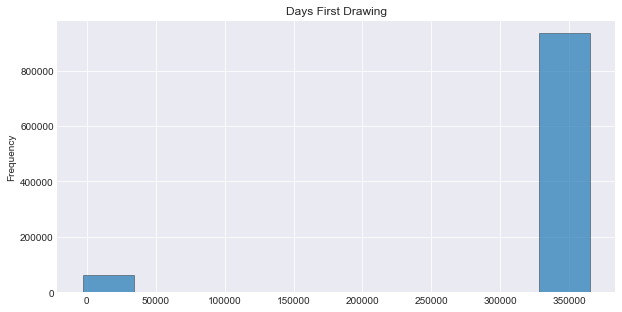

In [22]:
eda.plot_hist(previous_app, 'DAYS_FIRST_DRAWING', 'Days First Drawing')

This column seemed to have almost no missing_values but there is one value that repeats itself over and over again. We have seen this before in the other datasets. It is a value that needs to be replaced with NaN. Given that the vast majority of the column has this value, we'll probably going to drop this column.

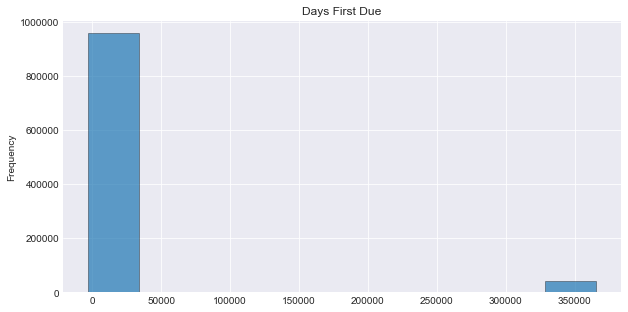

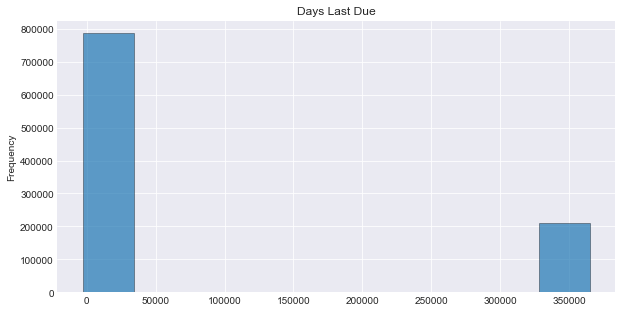

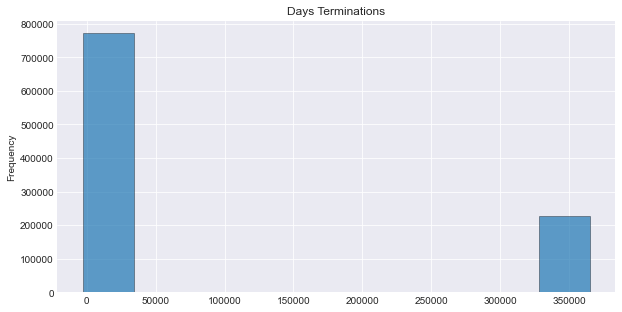

In [23]:
eda.plot_hist(previous_app, 'DAYS_FIRST_DUE', 'Days First Due')
eda.plot_hist(previous_app, 'DAYS_LAST_DUE', 'Days Last Due')
eda.plot_hist(previous_app, 'DAYS_TERMINATION', 'Days Terminations')

The same happens for these variables. Let's see what is this so repeated value and replace it with a NaN:

In [24]:
previous_app['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [25]:
previous_app['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace = True)
previous_app['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace = True)
previous_app['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace = True)
previous_app['DAYS_LAST_DUE'].replace(365243, np.nan, inplace = True)
previous_app['DAYS_TERMINATION'].replace(365243, np.nan, inplace = True)

If we repeat the plots, it is clearly correct now.

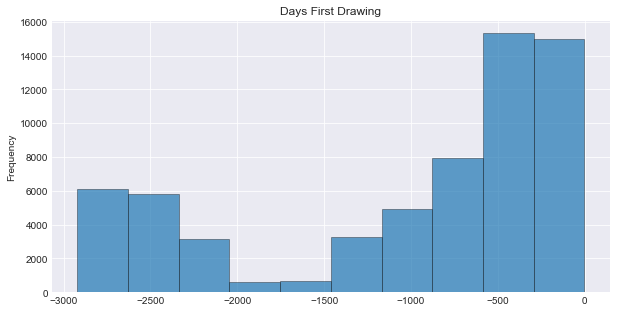

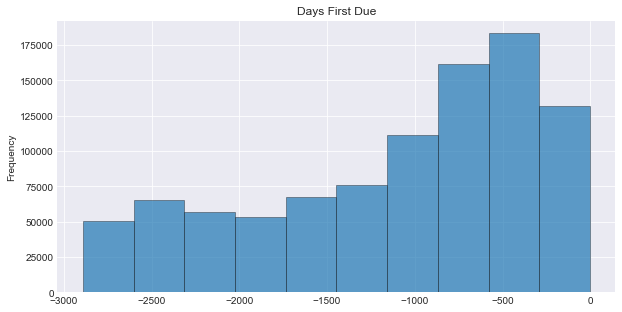

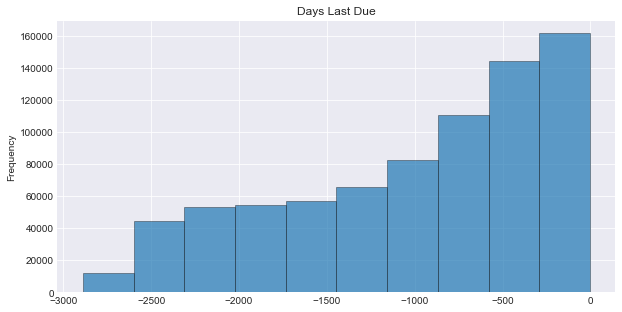

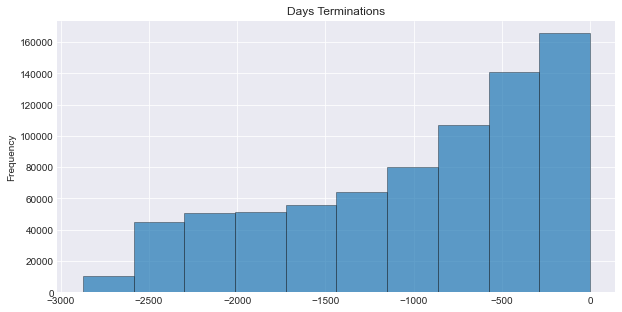

In [26]:
eda.plot_hist(previous_app, 'DAYS_FIRST_DRAWING', 'Days First Drawing')
eda.plot_hist(previous_app, 'DAYS_FIRST_DUE', 'Days First Due')
eda.plot_hist(previous_app, 'DAYS_LAST_DUE', 'Days Last Due')
eda.plot_hist(previous_app, 'DAYS_TERMINATION', 'Days Terminations')

[COMMENT]

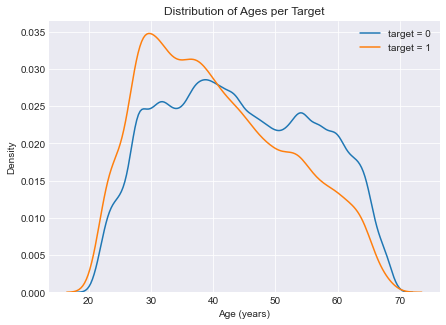

In [27]:
## AGAIN, IS IT POSSIBLE TO RELATE SOME VARIABLE WITH THE TARGET?
plt.figure(figsize = (7, 5))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target = 1')
plt.legend()
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages per Target')
plt.show()

Let's now analyze our categorical variables.

#### 3.D. Categorical Variables

In [28]:
np.array(previous_app.columns[previous_app.dtypes == 'object'])

array(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype=object)

In [29]:
previous_app.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

[COMMENT: what are the columns? something about the number of unique values]



[COMMENT: no more analysis? maybe some pie charts or histograms?]

#### 3.E. Correlations

In [30]:
previous_app.iloc[:, 2:].corr()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
AMT_ANNUITY                   1.000000         0.808872    0.816429   
AMT_APPLICATION               0.808872         1.000000    0.975824   
AMT_CREDIT                    0.816429         0.975824    1.000000   
AMT_DOWN_PAYMENT              0.267694         0.482776    0.301284   
AMT_GOODS_PRICE               0.820895         0.999884    0.993087   
HOUR_APPR_PROCESS_START      -0.036201        -0.014415   -0.021039   
NFLAG_LAST_APPL_IN_DAY        0.020639         0.004310   -0.025179   
RATE_DOWN_PAYMENT            -0.103878        -0.072479   -0.188128   
RATE_INTEREST_PRIMARY         0.141823         0.110001    0.125106   
RATE_INTEREST_PRIVILEGED     -0.202335        -0.199733   -0.205158   
DAYS_DECISION                 0.279051         0.133660    0.133763   
SELLERPLACE_AREA             -0.015027        -0.007649   -0.009567   
CNT_PAYMENT                   0.394535         0.680630    0.674278   
DAYS_FIRST_DRAWING            0.228503         0.390039    0.237309   
DAYS_FIRST_DUE                0.271278         0.267942    0.272737   
DAYS_LAST_DUE_1ST_VERSION     0.352772         0.463425    0.482004   
DAYS_LAST_DUE                 0.305586         0.302057    0.318221   
DAYS_TERMINATION              0.300777         0.296266    0.318958   
NFLAG_INSURED_ON_APPROVAL     0.283080         0.259219    0.263932   

                           AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
AMT_ANNUITY                        0.267694         0.820895   
AMT_APPLICATION                    0.482776         0.999884   
AMT_CREDIT                         0.301284         0.993087   
AMT_DOWN_PAYMENT                   1.000000         0.482776   
AMT_GOODS_PRICE                    0.482776         1.000000   
HOUR_APPR_PROCESS_START            0.016776        -0.045267   
NFLAG_LAST_APPL_IN_DAY             0.001597        -0.017100   
RATE_DOWN_PAYMENT                  0.473935        -0.072479   
RATE_INTEREST_PRIMARY              0.016323         0.110001   
RATE_INTEREST_PRIVILEGED          -0.115343        -0.199733   
DAYS_DECISION                     -0.024536         0.290422   
SELLERPLACE_AREA                   0.003533        -0.015842   
CNT_PAYMENT                        0.031659         0.672129   
DAYS_FIRST_DRAWING                -0.555944         0.022011   
DAYS_FIRST_DUE                    -0.021626         0.261751   
DAYS_LAST_DUE_1ST_VERSION         -0.022549         0.463425   
DAYS_LAST_DUE                     -0.014047         0.304946   
DAYS_TERMINATION                  -0.013537         0.304917   
NFLAG_INSURED_ON_APPROVAL         -0.042585         0.243400   

                           HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  \
AMT_ANNUITY                              -0.036201                0.020639   
AMT_APPLICATION                          -0.014415                0.004310   
AMT_CREDIT                               -0.021039               -0.025179   
AMT_DOWN_PAYMENT                          0.016776                0.001597   
AMT_GOODS_PRICE                          -0.045267               -0.017100   
HOUR_APPR_PROCESS_START                   1.000000                0.005789   
NFLAG_LAST_APPL_IN_DAY                    0.005789                1.000000   
RATE_DOWN_PAYMENT                         0.025930                0.004554   
RATE_INTEREST_PRIMARY                    -0.027172                0.009604   
RATE_INTEREST_PRIVILEGED                 -0.045720                0.024640   
DAYS_DECISION                            -0.039962                0.016555   
SELLERPLACE_AREA                          0.015671                0.000912   
CNT_PAYMENT                              -0.055511                0.063347   
DAYS_FIRST_DRAWING                       -0.014260               -0.013156   
DAYS_FIRST_DUE                           -0.003786               -0.016980   
DAYS_LAST_DUE_1ST_VERSION                -0.027029               -0.018509   

<div class="alert alert-danger">
    <b> FINAL REMARKS </b>
    <br> This is to summarize what were the conclusions of this part. TO DELETE ONCE THE DATA CLEANING IS DONE. </br>
    <p> </p>
    <p> i) </p>
    <p> ii) </p>
    <p> iii) </p>
    <p> iv) </p>
    <p> v) </p>
</div>